In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import shap
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

In [285]:
data = pd.read_csv('./data/data.csv')

In [286]:
data['Difference of inflation'] = data['Food Inflation Rate'] - data['Overall Inflation Rate']

In [287]:
# binary_encoder = ce.BinaryEncoder(cols=['Item', 'Area'])
# data=binary_encoder.fit_transform(data)

In [288]:
label_encoder = LabelEncoder()

In [289]:
data['Item'] = label_encoder.fit_transform(data['Item'])

In [290]:
data['Area'] = label_encoder.fit_transform(data['Area'])

In [291]:
numerical_columns = ['Food Inflation Rate', 'Raw GDP', 'GDP Growth Rate', 'Item Price Per Tonne',
                     'Overall Inflation Rate', 'Item', 'Area', 'Year', 'Difference of inflation']

In [292]:
numerical_columns

['Food Inflation Rate',
 'Raw GDP',
 'GDP Growth Rate',
 'Item Price Per Tonne',
 'Overall Inflation Rate',
 'Item',
 'Area',
 'Year',
 'Difference of inflation']

In [293]:
scaler = RobustScaler()

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [294]:
data.head()

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate,Difference of inflation
0,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-1.000000,-0.299190,0.708333,-0.704691
1,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.986667,-0.229156,0.708333,-0.704691
2,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.906667,-0.330420,0.708333,-0.704691
3,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.893333,0.395618,0.708333,-0.704691
4,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.813333,-0.396085,0.708333,-0.704691


In [295]:
km = KMeans(2)

In [296]:
pca = PCA(2)

data_new = pca.fit_transform(data)
data_new

array([[ 0.07979987, -1.24697817],
       [ 0.07617205, -1.24037473],
       [ 0.08170355, -1.25006348],
       ...,
       [-1.02308668,  1.21774295],
       [-0.62658774,  0.50164457],
       [-0.53754852,  0.34091324]])

In [297]:
km.fit(data_new)
clusters = km.labels_.tolist()

In [298]:
label = km.fit_predict(data_new)

u_labels = np.unique(label)

labels = km.labels_
u_labels

array([0, 1], dtype=int32)

In [299]:
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

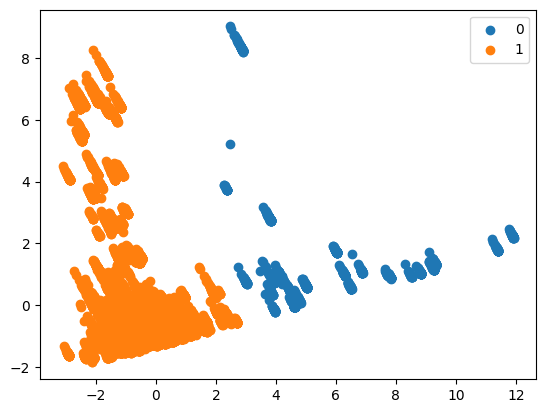

In [300]:
for i in u_labels:
    plt.scatter(data_new[label == i , 0] , data_new[label == i , 1] , label = i)
plt.legend()

In [301]:
# df_new=binary_encoder.inverse_transform(df_new)
# df_new[numerical_columns] = scaler.inverse_transform(data[numerical_columns])
data['label']=labels

In [302]:
data

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate,Difference of inflation,label
0,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-1.000000,-0.299190,0.708333,-0.704691,1
1,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.986667,-0.229156,0.708333,-0.704691,1
2,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.906667,-0.330420,0.708333,-0.704691,1
3,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.893333,0.395618,0.708333,-0.704691,1
4,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.813333,-0.396085,0.708333,-0.704691,1
...,...,...,...,...,...,...,...,...,...,...
15644,0.823529,0.833333,-0.104060,1.261023,-0.232093,0.813333,1.471013,0.500000,-0.840933,1
15645,0.823529,0.833333,-0.104060,1.261023,-0.232093,0.826667,-0.303443,0.500000,-0.840933,1
15646,0.823529,0.833333,-0.104060,1.261023,-0.232093,0.840000,9.096195,0.500000,-0.840933,1
15647,0.823529,0.833333,-0.104060,1.261023,-0.232093,0.866667,1.523510,0.500000,-0.840933,1


In [303]:
# df_new.groupby(['Area','Year'])['label'].sum()

In [304]:
X, Y = data.drop(columns=['label']), data['label']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [305]:
count_label_1 = (y_test == 0).sum()
print(f"Number of labels '1' in y_train: {count_label_1}")

Number of labels '1' in y_train: 213


In [306]:
classifier = RandomForestClassifier(
    n_estimators=3,
    max_depth=2,
    # min_samples_split=5,
    # min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=3, random_state=42)

In [307]:
preds = classifier.predict(x_test)

In [308]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00      2917

    accuracy                           1.00      3130
   macro avg       1.00      1.00      1.00      3130
weighted avg       1.00      1.00      1.00      3130



In [309]:
data

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate,Difference of inflation,label
0,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-1.000000,-0.299190,0.708333,-0.704691,1
1,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.986667,-0.229156,0.708333,-0.704691,1
2,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.906667,-0.330420,0.708333,-0.704691,1
3,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.893333,0.395618,0.708333,-0.704691,1
4,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.813333,-0.396085,0.708333,-0.704691,1
...,...,...,...,...,...,...,...,...,...,...
15644,0.823529,0.833333,-0.104060,1.261023,-0.232093,0.813333,1.471013,0.500000,-0.840933,1
15645,0.823529,0.833333,-0.104060,1.261023,-0.232093,0.826667,-0.303443,0.500000,-0.840933,1
15646,0.823529,0.833333,-0.104060,1.261023,-0.232093,0.840000,9.096195,0.500000,-0.840933,1
15647,0.823529,0.833333,-0.104060,1.261023,-0.232093,0.866667,1.523510,0.500000,-0.840933,1


In [310]:
data[numerical_columns]

,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item Price Per Tonne,Overall Inflation Rate,Item,Area,Year,Difference of inflation
0,0.160705,-0.422628,-0.784202,-0.299190,0.708333,-1.000000,-0.941176,-0.833333,-0.704691
1,0.160705,-0.422628,-0.784202,-0.229156,0.708333,-0.986667,-0.941176,-0.833333,-0.704691
2,0.160705,-0.422628,-0.784202,-0.330420,0.708333,-0.906667,-0.941176,-0.833333,-0.704691
3,0.160705,-0.422628,-0.784202,0.395618,0.708333,-0.893333,-0.941176,-0.833333,-0.704691
4,0.160705,-0.422628,-0.784202,-0.396085,0.708333,-0.813333,-0.941176,-0.833333,-0.704691
...,...,...,...,...,...,...,...,...,...
15644,-0.104060,1.261023,-0.232093,1.471013,0.500000,0.813333,0.823529,0.833333,-0.840933
15645,-0.104060,1.261023,-0.232093,-0.303443,0.500000,0.826667,0.823529,0.833333,-0.840933
15646,-0.104060,1.261023,-0.232093,9.096195,0.500000,0.840000,0.823529,0.833333,-0.840933
15647,-0.104060,1.261023,-0.232093,1.523510,0.500000,0.866667,0.823529,0.833333,-0.840933


In [311]:
data[numerical_columns] = scaler.inverse_transform(data[numerical_columns])

In [312]:
data

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate,Difference of inflation,label
0,0.0,2012.0,2.404087,12319.779604,-4.430218,2.0,369.7,3.2,-0.795913,1
1,0.0,2012.0,2.404087,12319.779604,-4.430218,3.0,489.9,3.2,-0.795913,1
2,0.0,2012.0,2.404087,12319.779604,-4.430218,9.0,316.1,3.2,-0.795913,1
3,0.0,2012.0,2.404087,12319.779604,-4.430218,10.0,1562.2,3.2,-0.795913,1
4,0.0,2012.0,2.404087,12319.779604,-4.430218,16.0,203.4,3.2,-0.795913,1
...,...,...,...,...,...,...,...,...,...,...
15644,30.0,2022.0,1.661019,818426.550206,0.616880,138.0,3407.9,2.7,-1.038981,1
15645,30.0,2022.0,1.661019,818426.550206,0.616880,139.0,362.4,2.7,-1.038981,1
15646,30.0,2022.0,1.661019,818426.550206,0.616880,140.0,16495.0,2.7,-1.038981,1
15647,30.0,2022.0,1.661019,818426.550206,0.616880,142.0,3498.0,2.7,-1.038981,1


In [313]:
data['Area'] = data['Area'].astype(int)

In [314]:
data['Area'] = label_encoder.inverse_transform(data['Area'])

In [315]:
data

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate,Difference of inflation,label
0,Albania,2012.0,2.404087,12319.779604,-4.430218,2.0,369.7,3.2,-0.795913,1
1,Albania,2012.0,2.404087,12319.779604,-4.430218,3.0,489.9,3.2,-0.795913,1
2,Albania,2012.0,2.404087,12319.779604,-4.430218,9.0,316.1,3.2,-0.795913,1
3,Albania,2012.0,2.404087,12319.779604,-4.430218,10.0,1562.2,3.2,-0.795913,1
4,Albania,2012.0,2.404087,12319.779604,-4.430218,16.0,203.4,3.2,-0.795913,1
...,...,...,...,...,...,...,...,...,...,...
15644,Switzerland,2022.0,1.661019,818426.550206,0.616880,138.0,3407.9,2.7,-1.038981,1
15645,Switzerland,2022.0,1.661019,818426.550206,0.616880,139.0,362.4,2.7,-1.038981,1
15646,Switzerland,2022.0,1.661019,818426.550206,0.616880,140.0,16495.0,2.7,-1.038981,1
15647,Switzerland,2022.0,1.661019,818426.550206,0.616880,142.0,3498.0,2.7,-1.038981,1


In [316]:
explainer = shap.Explainer(classifier)

shap_values = explainer(x_train)

In [317]:
x_train

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate,Difference of inflation
11770,0.470588,-0.333333,-2.059799,-0.076827,-1.495274,0.813333,-0.100041,-0.791667,-2.179888
9594,0.176471,0.000000,-0.604148,-0.424743,0.350879,0.520000,-0.294005,0.250000,-1.291306
9489,0.176471,-0.500000,-1.035508,-0.424628,0.251083,0.573333,-0.264756,-0.625000,-0.792799
8778,0.117647,-0.333333,-0.420832,-0.322943,-1.679177,-0.186667,1.837208,-0.583333,0.118086
9572,0.176471,-0.166667,-1.158964,-0.426069,0.361210,0.893333,-0.418633,-0.541667,-1.099108
...,...,...,...,...,...,...,...,...,...
5191,-0.352941,0.166667,0.120399,7.852744,0.540958,-0.533333,2.788207,0.166667,-0.039432
13418,0.647059,0.500000,0.559699,-0.336129,-0.430741,0.186667,1.235507,-0.750000,1.884744
5390,-0.352941,0.666667,0.412360,8.487812,0.799979,-0.773333,-0.328148,0.708333,-0.308817
860,-0.882353,-0.333333,-0.401564,0.349112,-1.788957,0.146667,-0.386587,-0.291667,-0.243962


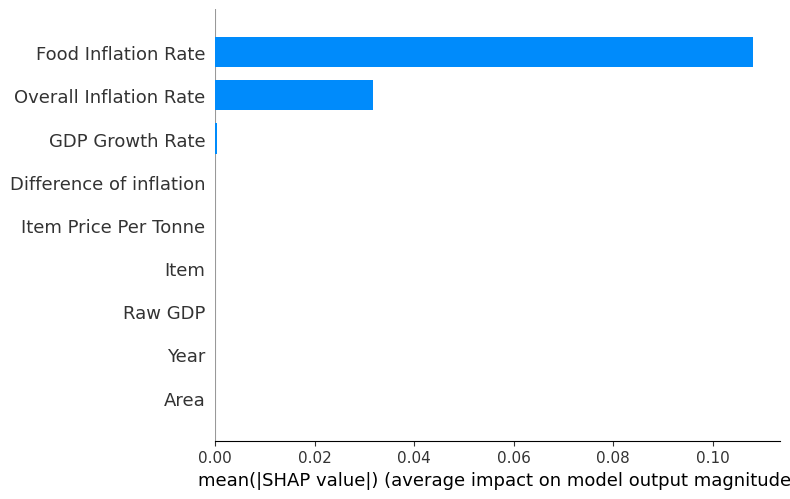

In [327]:
shap.summary_plot(shap_values[:, :, 1], x_test, plot_type="bar")

In [332]:
shap.plots.bar(shap_values)

IndexError: list index out of range

In [324]:
print(type(shap_values))

<class 'shap._explanation.Explanation'>


In [322]:
shap_values_array = shap_values.values
feature_names = x_train.columns
shap.dependence_plot('Overall Inflation Rate', shap_values_array, x_train,feature_names=feature_names)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 50

In [ ]:
shap.initjs()  # Initialize JavaScript visualization (necessary in Jupyter notebooks)
# shap.force_plot(explainer.expected_value, shap_values[0], x_train.iloc[0])